In [1]:
#Aquí vamos a cargar unas librerias que vamos a utilizar para el manejo de datos
import numpy as np
import pandas as pd
import seaborn as sns
import random
import plotly.figure_factory as ff

# Librerias para hacer el grafico del mapa

In [2]:
#Aquí cargamos librerias para graficar
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as pyo
#import cufflinks as cf
#from IPython.display import display, HTML
#cf.set_config_file(sharing = 'public', theme = 'white', offline = True)

# Datos para el mapa de Colombia

In [3]:
#import json
#from urllib.request import urlopen
#with urlopen('https://gist.githubusercontent.com/john-guerra/43c7656821069d00dcbc/raw/be6a6e239cd5b5b803c6e7c2ec405b793a9064dd/Colombia.geo.json') as response:
    #Departamentos = json.load(response)

In [4]:
#Aquí accedemos a los datos tipo JSON que no van a permitir realizar graficos con el mapa de colombia
import json
from urllib.request import urlopen
with urlopen('https://raw.githubusercontent.com/jadiazm/jadiazm-ICFES-Data-Project/main/depto/depto.json') as response:
    Departamentos = json.load(response)

In [5]:
#Aquí cargamos desde nuestro computador los datos 
df = pd.read_csv('icfes_data.csv', sep='\t')

c:\users\cristian\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning:

Columns (77,80,81,82,83) have mixed types.Specify dtype option on import or set low_memory=False.



# Analisis de los resultados por año

In [6]:
df.head()

ESTU_CONSECUTIVO ESTU_TIPODOCUMENTO ESTU_NACIONALIDAD ESTU_GENERO  \
0  SB11202040001656                 TI          COLOMBIA           M   
1  SB11202040001763                 TI          COLOMBIA           F   
2  SB11202040001490                 TI          COLOMBIA           F   
3  SB11202040096445                 TI          COLOMBIA           M   
4  SB11202040048154                 TI          COLOMBIA           M   

  ESTU_FECHANACIMIENTO  PERIODO ESTU_ESTUDIANTE ESTU_PAIS_RESIDE  \
0           03/07/2003    20204      ESTUDIANTE         COLOMBIA   
1           16/06/2003    20204      ESTUDIANTE         COLOMBIA   
2           11/09/2003    20204      ESTUDIANTE         COLOMBIA   
3           05/03/2004    20204      ESTUDIANTE         COLOMBIA   
4           30/08/2003    20204      ESTUDIANTE         COLOMBIA   

  ESTU_TIENEETNIA ESTU_DEPTO_RESIDE  ...  PUNT_GLOBAL PERCENTIL_GLOBAL  \
0              No            CALDAS  ...          261             61.0   
1              No            BOGOTÁ  ...          306             87.0   
2              No            BOGOTÁ  ...          321             92.0   
3              No            BOGOTÁ  ...          338             96.0   
4              No            TOLIMA  ...          225             35.0   

   ESTU_INSE_INDIVIDUAL ESTU_NSE_INDIVIDUAL ESTU_NSE_ESTABLECIMIENTO  \
0             61.340840                 3.0                      3.0   
1             71.825844                 4.0                      4.0   
2             57.286312                 3.0                      3.0   
3             67.476602                 4.0                      4.0   
4             43.877158                 2.0                      2.0   

  ESTU_ESTADOINVESTIGACION         ESTU_GENERACION-E ESTU_ETNIA ESTU_PILOPAGA  \
0                 PUBLICAR                        NO        NaN           NaN   
1                 PUBLICAR                        NO        NaN           NaN   
2                 PUBLICAR                        NO        NaN           NaN   
3                 PUBLICAR                        NO        NaN           NaN   
4                 PUBLICAR  GENERACION E - GRATUIDAD        NaN           NaN   

  ESTU_LIMITA_MOTRIZ  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  

[5 rows x 84 columns]

Veamos primero como es la forma de la distribución de los resultados de todos los estudiantes.

In [10]:
len(df.columns)

84

# A continuación vemos que existe un error en las calificaciones.

<AxesSubplot:>

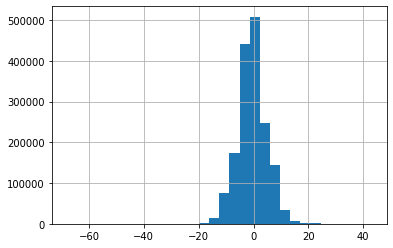

In [11]:
(df[['PUNT_MATEMATICAS', 'PUNT_LECTURA_CRITICA', 
                    'PUNT_C_NATURALES', 'PUNT_INGLES', 'PUNT_SOCIALES_CIUDADANAS']].sum(axis=1)-df['PUNT_GLOBAL']).hist(bins = 30)

In [12]:
df['PUNT_GLOBAL'].loc[4]

225

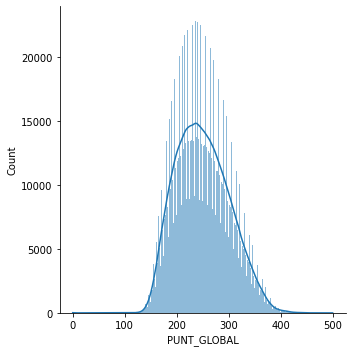

In [13]:
sns.displot(df['PUNT_GLOBAL'], kde=True, linewidth=0)

Veamos ahora si las distribuciones por año son similares

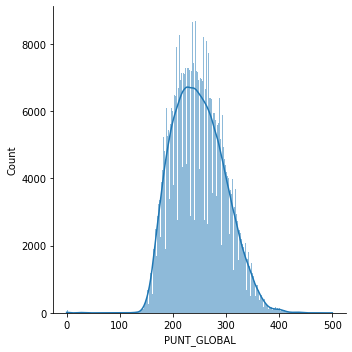

In [14]:
Columnas_Puntajes = ['PERIODO', 'PUNT_GLOBAL', 'PUNT_MATEMATICAS', 'PUNT_LECTURA_CRITICA', 
                    'PUNT_C_NATURALES', 'PUNT_INGLES', 'PUNT_SOCIALES_CIUDADANAS', 'FAMI_ESTRATOVIVIENDA']

df_Punt = df[Columnas_Puntajes].replace({20194:20192,
                             20204:20202})
df_Punt_20202 = df_Punt[df_Punt['PERIODO'] == 20202]
df_Punt_20201 = df_Punt[df_Punt['PERIODO'] == 20201]
df_Punt_20192 = df_Punt[df_Punt['PERIODO'] == 20192]
df_Punt_20191 = df_Punt[df_Punt['PERIODO'] == 20191]
df_Punt_20182 = df_Punt[df_Punt['PERIODO'] == 20182]
df_Punt_20181 = df_Punt[df_Punt['PERIODO'] == 20181]
sns.displot(df_Punt_20202['PUNT_GLOBAL'], kde=True, linewidth=0)

In [15]:
df_Punt_20181.head()

PERIODO  PUNT_GLOBAL  PUNT_MATEMATICAS  PUNT_LECTURA_CRITICA  \
1072167    20181          226                46                    47   
1072168    20181          263                62                    45   
1072169    20181          204                43                    44   
1072170    20181          331                75                    65   
1072171    20181          318                62                    69   

         PUNT_C_NATURALES  PUNT_INGLES  PUNT_SOCIALES_CIUDADANAS  \
1072167                47         44.0                        41   
1072168                58         58.0                        44   
1072169                45         32.0                        34   
1072170                61         50.0                        69   
1072171                63         62.0                        61   

        FAMI_ESTRATOVIVIENDA  
1072167            Estrato 3  
1072168            Estrato 4  
1072169            Estrato 1  
1072170            Estrato 1  
1072171            Estrato 2

Distribuciones de cada examen separadas.

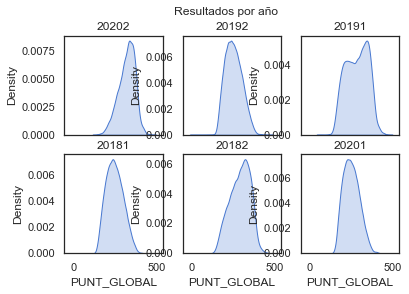

In [16]:
sns.set(style="white", palette="muted", color_codes=True)
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex=True)
fig.suptitle("Resultados por año", fontsize=12)
axs = [ax1,ax2,ax3,ax4,ax5,ax6]
Year=df_Punt['PERIODO'].unique()
Punt=[df_Punt_20181,df_Punt_20182, df_Punt_20191, df_Punt_20192, df_Punt_20201, df_Punt_20202 ]
for i in range(0,6):
    sns.kdeplot(Punt[i].iloc[:,1], ax=axs[i], shade=True)
    axs[i].set_title(Year[i])

In [17]:
len(Punt[5].iloc[:,1])

504872

In [18]:
#Escogemos una muestra de aproxidamente 12.000 estudiantes que presentaron el examen en cada semestre.
#Tamaño_Muestra = len(Punt[0].iloc[:,1])
Tamaño_Muestra = 1000
x1 = Punt[0].sample(Tamaño_Muestra)
x2 = Punt[1].sample(Tamaño_Muestra)
x3 = Punt[2].sample(Tamaño_Muestra)
x4 = Punt[3].sample(Tamaño_Muestra)
x5 = Punt[4].sample(Tamaño_Muestra)
x6 = Punt[5].sample(Tamaño_Muestra)

# Group data together
hist_data = [x1.iloc[:,1], x2.iloc[:,1], x3.iloc[:,1], x4.iloc[:,1], x5.iloc[:,1], x6.iloc[:,1]]

colors = ['#1f77b4',  # muted blue
    '#ff7f0e',  # safety orange
    '#2ca02c',  # cooked asparagus green
    '#d62728',  # brick red
    '#9467bd',  # muted purple
    '#8c564b',  # chestnut brown
    '#e377c2',  # raspberry yogurt pink
         ]
          
group_labels = ['2018-1', '2018-2', '2019-1', '2019-2', '2020-1', '2020-2']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, show_hist=False ,colors=colors , show_rug=False, bin_size = 10)
fig.show()

# Comparación de medias y varianzas entre las distribuciones - muestras

In [19]:
#Librerias para el analisis estadístico
import statsmodels.api as sm
import scipy.stats.distributions as dist

Hipótesis nula: media de la distribución es igual a la media de la muestra

In [20]:
print('El primer valor corresponde al valor t y el segundo al p-value')
for i in range(0,6):
    print('Pruebas de hipotesis comparando para el periodo ' + group_labels[i])
    print(sm.stats.ztest(Punt[i].iloc[:,1].sample(1000), value = Punt[i].iloc[:,1].mean()))

El primer valor corresponde al valor t y el segundo al p-value
Pruebas de hipotesis comparando para el periodo 2018-1
(0.24437770692913646, 0.8069383057456001)
Pruebas de hipotesis comparando para el periodo 2018-2
(1.872326631087197, 0.061161428582068085)
Pruebas de hipotesis comparando para el periodo 2019-1
(-0.4389388449006666, 0.6607058491831594)
Pruebas de hipotesis comparando para el periodo 2019-2
(-1.430635164327027, 0.15253480390737165)
Pruebas de hipotesis comparando para el periodo 2020-1
(-2.0606779398811828, 0.03933377558215553)
Pruebas de hipotesis comparando para el periodo 2020-2
(2.909991345302643, 0.003614387647505075)


No hay evidencia para rechazar la hipótesis nula.

Distribuciones superpuestas de todos los examenes.

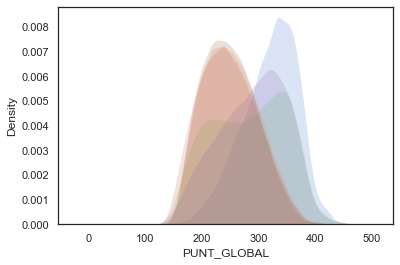

In [21]:
for i in range(0,6):
    sns.kdeplot(data=Punt[i].iloc[:,1], fill=True, common_norm=False, palette="crest", alpha=0.2, linewidth=0)



<AxesSubplot:xlabel='PUNT_GLOBAL', ylabel='Density'>

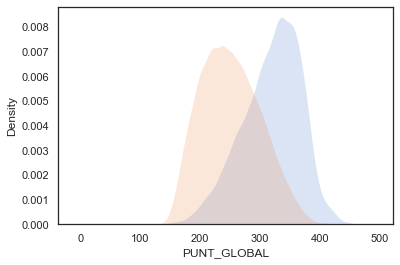

In [22]:
#Distribuciones del año 2018
sns.kdeplot(data=Punt[0].iloc[:,1], fill=True, common_norm=False, palette="crest", alpha=0.2, linewidth=0)
sns.kdeplot(data=Punt[1].iloc[:,1], fill=True, common_norm=False, palette="crest", alpha=0.2, linewidth=0)

<AxesSubplot:xlabel='PUNT_GLOBAL', ylabel='Density'>

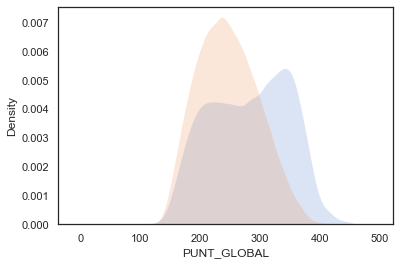

In [23]:
#Distribuciones del año 2019
sns.kdeplot(data=Punt[2].iloc[:,1], fill=True, common_norm=False, palette="crest", alpha=0.2, linewidth=0)
sns.kdeplot(data=Punt[3].iloc[:,1], fill=True, common_norm=False, palette="crest", alpha=0.2, linewidth=0)

<AxesSubplot:xlabel='PUNT_GLOBAL', ylabel='Density'>

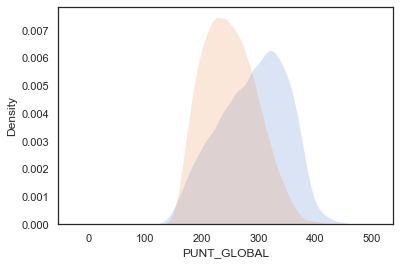

In [24]:
#Distribuciones del año 2020
sns.kdeplot(data=Punt[4].iloc[:,1], fill=True, common_norm=False, palette="crest", alpha=0.2, linewidth=0)
sns.kdeplot(data=Punt[5].iloc[:,1], fill=True, common_norm=False, palette="crest", alpha=0.2, linewidth=0)

Estos graficos nos permiten hacer una comparación visual de las distribuciones de los resultados, que aparentemente tienen medias muy diferentes, para asegurarnos de eso, vamos a realizar una ptueba de hipótesis comparndo las medias de los resultados de cada año.

# Regrsión Lineal

In [25]:
import statsmodels.formula.api as smf

In [26]:
x1.head()

PERIODO  PUNT_GLOBAL  PUNT_MATEMATICAS  PUNT_LECTURA_CRITICA  \
1080589    20181          380                76                    75   
1083757    20181          365                76                    69   
1079058    20181          357                70                    69   
1077336    20181          297                59                    57   
1080223    20181          324                57                    70   

         PUNT_C_NATURALES  PUNT_INGLES  PUNT_SOCIALES_CIUDADANAS  \
1080589                72         81.0                        79   
1083757                71         77.0                        75   
1079058                73         82.0                        70   
1077336                64         66.0                        55   
1080223                63         75.0                        66   

        FAMI_ESTRATOVIVIENDA  
1080589            Estrato 5  
1083757            Estrato 3  
1079058            Estrato 6  
1077336            Estrato 3  
1080223            Estrato 4

In [27]:
Regresion_Lineal = smf.ols('PUNT_GLOBAL ~ PUNT_MATEMATICAS ', data = x1)
Resultados = Regresion_Lineal.fit()
print(Resultados.summary())

                            OLS Regression Results                            
Dep. Variable:            PUNT_GLOBAL   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     5174.
Date:                Tue, 11 Oct 2022   Prob (F-statistic):               0.00
Time:                        12:06:26   Log-Likelihood:                -4420.2
No. Observations:                1000   AIC:                             8844.
Df Residuals:                     998   BIC:                             8854.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           70.7080      3.504  

In [28]:
x1['PUNT_GLOBAL'].max()

466

In [38]:
import plotly.express as px
#x_range = np.linspace(x.min(), x.max(), 100)
#y_range = model.predict(x_range.reshape(-1, 1))
x = np.linspace(0,100, 1000)
y = 3.88*x + 70.70
line = pd.DataFrame(dict(x = x, y = y))

fig = px.scatter(x1, x='PUNT_MATEMATICAS', y='PUNT_GLOBAL', color = 'FAMI_ESTRATOVIVIENDA', opacity=0.65)
fig.add_traces(go.Scatter(x=x, y=y, name='Regression Fit'))
fig.show()

Vemos como la regresión lineal se ajusta adecuadamente.

Ahora veamos si los coeficientes del ajuste cambian si hacemos una regresión multinivel tomando como los grupos por estrato.
Nota: Esperamos que el resultado no cambie significativamente.

# Ajuste multinivel por estrato.

In [30]:
x1.head()

PERIODO  PUNT_GLOBAL  PUNT_MATEMATICAS  PUNT_LECTURA_CRITICA  \
1080589    20181          380                76                    75   
1083757    20181          365                76                    69   
1079058    20181          357                70                    69   
1077336    20181          297                59                    57   
1080223    20181          324                57                    70   

         PUNT_C_NATURALES  PUNT_INGLES  PUNT_SOCIALES_CIUDADANAS  \
1080589                72         81.0                        79   
1083757                71         77.0                        75   
1079058                73         82.0                        70   
1077336                64         66.0                        55   
1080223                63         75.0                        66   

        FAMI_ESTRATOVIVIENDA  
1080589            Estrato 5  
1083757            Estrato 3  
1079058            Estrato 6  
1077336            Estrato 3  
1080223            Estrato 4

In [31]:
x1.replace({'Sin Estrato':0, 'Estrato 1': 1, 'Estrato 2': 2, 'Estrato 3': 3, 
                           'Estrato 4': 4, 'Estrato 5': 5, 'Estrato 6': 6, np.nan: 0, }, inplace = True )
#x1['FAMI_ESTRATOVIVIENDA'].unique()

In [34]:
# Build the model
mlm_mod = sm.MixedLM.from_formula(
    formula = 'PUNT_GLOBAL ~ PUNT_MATEMATICAS ', 
    groups = 'FAMI_ESTRATOVIVIENDA', 
    #re_formula="1 + age", 
    data = x1
)

# Run the fit
mlm_result = mlm_mod.fit()

# Print out the summary of the fit
print(mlm_result.summary())

               Mixed Linear Model Regression Results
Model:                MixedLM    Dependent Variable:    PUNT_GLOBAL
No. Observations:     1000       Method:                REML       
No. Groups:           7          Scale:                 395.7002   
Min. group size:      17         Log-Likelihood:        -4414.4167 
Max. group size:      235        Converged:             Yes        
Mean group size:      142.9                                        
-------------------------------------------------------------------
                         Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------
Intercept                75.313    3.961 19.016 0.000 67.551 83.076
PUNT_MATEMATICAS          3.803    0.058 65.596 0.000  3.689  3.916
FAMI_ESTRATOVIVIENDA Var 13.438    0.505                           



In [35]:
x1['FAMI_ESTRATOVIVIENDA'].replace({0:'Sin Estrato',1: 'Estrato 1',2: 'Estrato 2',3: 'Estrato 3', 
                           4: 'Estrato 4',5: 'Estrato 5',6: 'Estrato 6',}, inplace = True )

In [39]:
x = np.linspace(0,100, 1000)
y = 3.803 * x + 75.31
line = pd.DataFrame(dict(x = x, y = y))

fig = px.scatter(x1, x='PUNT_MATEMATICAS', y='PUNT_GLOBAL', color = 'FAMI_ESTRATOVIVIENDA', opacity=0.65)
fig.add_traces(go.Scatter(x=x, y=y, name='Regression Fit'))
fig.show()

A pesar que la pendiente y el intercepto cambian, lo hacen muy poco.
Comprobemos ahora si existe una correlación entre los grupos.

In [89]:
model = sm.GEE.from_formula("PUNT_MATEMATICAS ~ PUNT_GLOBAL", groups="FAMI_ESTRATOVIVIENDA",
           cov_struct=sm.cov_struct.Exchangeable(), data=x1)
result = model.fit()
print(result.cov_struct.summary())

The correlation between two observations in the same cluster is 0.005


Como vemos existe una correlación entre individuos del mismo grupo, pero esa correlación es muy pequeña, en pocas palabras no importa si hacemos una regresión lienal simple o multinivel, el calculo de la nota final de los estudiantes del icfes no tiene cesgos por estrato.

# Pruebas de hipótesis: Diferencia de medias en dos poblaciones independientes.

In [64]:
import statsmodels.api as sm
import scipy.stats.distributions as dist

Primero calculamos las medias de los resultados para cada año

In [65]:
mu_s=[]
for i in range (0,6):
    a =  df_Punt.where(df_Punt['PERIODO'] == df_Punt['PERIODO'].unique()[i])['PUNT_GLOBAL'].mean()
    mu_s.append(a)
mu_s

[248.34710183967422,
 246.18646423000592,
 281.5698904330503,
 319.0647401612517,
 250.77549669596715,
 289.4343375445416]

# Datos graficados sobre colombia

In [40]:
df_Punt.head()

PERIODO  PUNT_GLOBAL  PUNT_MATEMATICAS  PUNT_LECTURA_CRITICA  \
0    20202          261                51                    53   
1    20202          306                64                    62   
2    20202          321                66                    65   
3    20202          338                65                    64   
4    20202          225                44                    56   

   PUNT_C_NATURALES  PUNT_INGLES  PUNT_SOCIALES_CIUDADANAS  \
0                50         48.0                        56   
1                63         58.0                        57   
2                63         51.0                        67   
3                75         67.0                        67   
4                45         29.0                        40   

  FAMI_ESTRATOVIVIENDA  
0            Estrato 5  
1            Estrato 3  
2            Estrato 1  
3            Estrato 3  
4            Estrato 1

In [41]:
#Nos quedamos solo con las columnas del departamento y el puntaje de matemáticas
columnas_Mat = [
    'ESTU_DEPTO_RESIDE',
    'PUNT_MATEMATICAS',
]

In [42]:
df.head()

ESTU_CONSECUTIVO ESTU_TIPODOCUMENTO ESTU_NACIONALIDAD ESTU_GENERO  \
0  SB11202040001656                 TI          COLOMBIA           M   
1  SB11202040001763                 TI          COLOMBIA           F   
2  SB11202040001490                 TI          COLOMBIA           F   
3  SB11202040096445                 TI          COLOMBIA           M   
4  SB11202040048154                 TI          COLOMBIA           M   

  ESTU_FECHANACIMIENTO  PERIODO ESTU_ESTUDIANTE ESTU_PAIS_RESIDE  \
0           03/07/2003    20204      ESTUDIANTE         COLOMBIA   
1           16/06/2003    20204      ESTUDIANTE         COLOMBIA   
2           11/09/2003    20204      ESTUDIANTE         COLOMBIA   
3           05/03/2004    20204      ESTUDIANTE         COLOMBIA   
4           30/08/2003    20204      ESTUDIANTE         COLOMBIA   

  ESTU_TIENEETNIA ESTU_DEPTO_RESIDE  ...  PUNT_GLOBAL PERCENTIL_GLOBAL  \
0              No            CALDAS  ...          261             61.0   
1              No            BOGOTÁ  ...          306             87.0   
2              No            BOGOTÁ  ...          321             92.0   
3              No            BOGOTÁ  ...          338             96.0   
4              No            TOLIMA  ...          225             35.0   

   ESTU_INSE_INDIVIDUAL ESTU_NSE_INDIVIDUAL ESTU_NSE_ESTABLECIMIENTO  \
0             61.340840                 3.0                      3.0   
1             71.825844                 4.0                      4.0   
2             57.286312                 3.0                      3.0   
3             67.476602                 4.0                      4.0   
4             43.877158                 2.0                      2.0   

  ESTU_ESTADOINVESTIGACION         ESTU_GENERACION-E ESTU_ETNIA ESTU_PILOPAGA  \
0                 PUBLICAR                        NO        NaN           NaN   
1                 PUBLICAR                        NO        NaN           NaN   
2                 PUBLICAR                        NO        NaN           NaN   
3                 PUBLICAR                        NO        NaN           NaN   
4                 PUBLICAR  GENERACION E - GRATUIDAD        NaN           NaN   

  ESTU_LIMITA_MOTRIZ  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  

[5 rows x 84 columns]

In [43]:
#Reemplazar algunos nombres de departamentos para que ean los mismos del documento JSON
df_Mat=df[columnas_Mat].replace({'BOGOTA':'SANTAFE DE BOGOTA D.C',
                             'BOGOTÁ':'SANTAFE DE BOGOTA D.C',
                             'SAN ANDRES':'ARCHIPIELAGO DE SAN ANDRES PROVIDENCIA Y SANTA CATALINA',
                             'VALLE': 'VALLE DEL CAUCA'})

df_Mat=df_Mat.groupby(['ESTU_DEPTO_RESIDE']).mean().drop(index='EXTRANJERO', axis=0).reset_index().rename(columns={'ESTU_DEPTO_RESIDE':'Departamento',
                        'PUNT_MATEMATICAS':'Número'})



In [44]:

df_Mat['suma']=df_Mat['Número']+50
df_Mat.head()

Departamento     Número        suma
0                                           AMAZONAS  42.639673   92.639673
1                                          ANTIOQUIA  49.258266   99.258266
2                                             ARAUCA  50.041409  100.041409
3  ARCHIPIELAGO DE SAN ANDRES PROVIDENCIA Y SANTA...  46.386523   96.386523
4                                          ATLANTICO  49.793439   99.793439

In [45]:
locs = df_Mat['Departamento']

for loc in Departamentos['features']:
    loc['id'] = loc['properties']['NOMBRE_DPT']
fig = go.Figure(go.Choroplethmapbox(
                    geojson=Departamentos,
                    locations=locs,
                    z=df_Mat['Número'],
                    colorscale='Viridis',
                    colorbar_title="Mates"))
fig.update_layout(mapbox_style="carto-positron",
                        mapbox_zoom=3.4,
                        mapbox_center = {"lat": 4.570868, "lon": -74.2973328})
fig.show()

In [11]:
#Esta parte es para verificar los nombre de los departamentos
#for i in Departamentos['features']:
#    print(i['properties'])


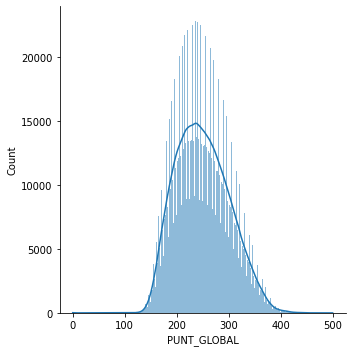

In [12]:
#from seaborn import distplot
sns.displot(df['PUNT_GLOBAL'], kde=True, linewidth=0)

In [13]:
Reg_Andina = [ 'Boyacá', 'Caldas', 'Caquetá', 'Casanare', 'Cundinamarca', 'Huila', 'Norte de Santander',
              'Putumayo', 'Quindio', 'Risaralda', 'Santander', 'Tolima']

Reg_Caribe = ['Antioquia', 'Atlantico', 'Bolivar', 'Cesar', 'Choco', 'Cordoba', 'La Guajira', 'Magdalena',
                           'Sucre']

Reg_Pacifico = ['Cauca', 'Choco', 'Nariño', 'Valle del Cauca']

Reg_Orinoquia = ['Arauca', 'Boyaca', 'Casanare', 'Cundinamarca', 'Meta', 'Vichada']

Reg_Amazonía = ['Amazonas', 'Caqueta', 'Guainía', 'Guaviare',   'Putumayo', 'Vaupés']

Reg_Insular = ['San Andres y Providencia']


regiones = {'Andina': Reg_Andina,
            'Caribe': Reg_Caribe,
            'Pacifico': Reg_Pacifico,
            'Oriniquía': Reg_Orinoquia, 
            'Amazonía': Reg_Amazonía, 
            'Insular': Reg_Insular}

# Alpicamos el modelo de predicción Knn

Vamos a clificar a los estudiantes en dos grupos, uno son los estudiantes que estan por encima del promedio y los otros por debajo

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

El promedio del puntaje de matemáticas es:

In [95]:
df.head()

ESTU_CONSECUTIVO ESTU_TIPODOCUMENTO ESTU_NACIONALIDAD ESTU_GENERO  \
0  SB11202040001656                 TI          COLOMBIA           M   
1  SB11202040001763                 TI          COLOMBIA           F   
2  SB11202040001490                 TI          COLOMBIA           F   
3  SB11202040096445                 TI          COLOMBIA           M   
4  SB11202040048154                 TI          COLOMBIA           M   

  ESTU_FECHANACIMIENTO  PERIODO ESTU_ESTUDIANTE ESTU_PAIS_RESIDE  \
0           03/07/2003    20204      ESTUDIANTE         COLOMBIA   
1           16/06/2003    20204      ESTUDIANTE         COLOMBIA   
2           11/09/2003    20204      ESTUDIANTE         COLOMBIA   
3           05/03/2004    20204      ESTUDIANTE         COLOMBIA   
4           30/08/2003    20204      ESTUDIANTE         COLOMBIA   

  ESTU_TIENEETNIA ESTU_DEPTO_RESIDE  ...  PUNT_GLOBAL PERCENTIL_GLOBAL  \
0              No            CALDAS  ...          261             61.0   
1              No            BOGOTÁ  ...          306             87.0   
2              No            BOGOTÁ  ...          321             92.0   
3              No            BOGOTÁ  ...          338             96.0   
4              No            TOLIMA  ...          225             35.0   

   ESTU_INSE_INDIVIDUAL ESTU_NSE_INDIVIDUAL ESTU_NSE_ESTABLECIMIENTO  \
0             61.340840                 3.0                      3.0   
1             71.825844                 4.0                      4.0   
2             57.286312                 3.0                      3.0   
3             67.476602                 4.0                      4.0   
4             43.877158                 2.0                      2.0   

  ESTU_ESTADOINVESTIGACION         ESTU_GENERACION-E ESTU_ETNIA ESTU_PILOPAGA  \
0                 PUBLICAR                        NO        NaN           NaN   
1                 PUBLICAR                        NO        NaN           NaN   
2                 PUBLICAR                        NO        NaN           NaN   
3                 PUBLICAR                        NO        NaN           NaN   
4                 PUBLICAR  GENERACION E - GRATUIDAD        NaN           NaN   

  ESTU_LIMITA_MOTRIZ  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  

[5 rows x 84 columns]

In [97]:
mean_df = df['PUNT_MATEMATICAS'].mean()
mean_df

50.8500899662619

In [98]:
df['Clasificación_label']= np.where(df['PUNT_MATEMATICAS'] >= mean_df, 1, 0 ) 

In [99]:
df['Clasificación'] = np.where(df['Clasificación_label'] == 1, 'Superior', 'Inferior' ) 
df.head()

ESTU_CONSECUTIVO ESTU_TIPODOCUMENTO ESTU_NACIONALIDAD ESTU_GENERO  \
0  SB11202040001656                 TI          COLOMBIA           M   
1  SB11202040001763                 TI          COLOMBIA           F   
2  SB11202040001490                 TI          COLOMBIA           F   
3  SB11202040096445                 TI          COLOMBIA           M   
4  SB11202040048154                 TI          COLOMBIA           M   

  ESTU_FECHANACIMIENTO  PERIODO ESTU_ESTUDIANTE ESTU_PAIS_RESIDE  \
0           03/07/2003    20204      ESTUDIANTE         COLOMBIA   
1           16/06/2003    20204      ESTUDIANTE         COLOMBIA   
2           11/09/2003    20204      ESTUDIANTE         COLOMBIA   
3           05/03/2004    20204      ESTUDIANTE         COLOMBIA   
4           30/08/2003    20204      ESTUDIANTE         COLOMBIA   

  ESTU_TIENEETNIA ESTU_DEPTO_RESIDE  ...  ESTU_INSE_INDIVIDUAL  \
0              No            CALDAS  ...             61.340840   
1              No            BOGOTÁ  ...             71.825844   
2              No            BOGOTÁ  ...             57.286312   
3              No            BOGOTÁ  ...             67.476602   
4              No            TOLIMA  ...             43.877158   

  ESTU_NSE_INDIVIDUAL  ESTU_NSE_ESTABLECIMIENTO ESTU_ESTADOINVESTIGACION  \
0                 3.0                       3.0                 PUBLICAR   
1                 4.0                       4.0                 PUBLICAR   
2                 3.0                       3.0                 PUBLICAR   
3                 4.0                       4.0                 PUBLICAR   
4                 2.0                       2.0                 PUBLICAR   

          ESTU_GENERACION-E ESTU_ETNIA ESTU_PILOPAGA ESTU_LIMITA_MOTRIZ  \
0                        NO        NaN           NaN                NaN   
1                        NO        NaN           NaN                NaN   
2                        NO        NaN           NaN                NaN   
3                        NO        NaN           NaN                NaN   
4  GENERACION E - GRATUIDAD        NaN           NaN                NaN   

  Clasificación_label Clasificación  
0                   1      Superior  
1                   1      Superior  
2                   1      Superior  
3                   1      Superior  
4                   0      Inferior  

[5 rows x 86 columns]

Creamos un mapa entre el label y la clasificación

In [100]:
Nom_Etiqueta = dict(zip(df.Clasificación_label.unique(), df.Clasificación.unique()))   
Nom_Etiqueta

{1: 'Superior', 0: 'Inferior'}

In [101]:
Cols = ['Clasificación_label',
        'Clasificación',
       # 'ESTU_GENERO',
        'PUNT_GLOBAL',
        'PUNT_MATEMATICAS',
        'PUNT_LECTURA_CRITICA', 
        'PUNT_C_NATURALES', 
        'PUNT_INGLES', 
        'PUNT_SOCIALES_CIUDADANAS',
        'FAMI_ESTRATOVIVIENDA','FAMI_CUARTOSHOGAR'
        ]

In [102]:
df['FAMI_CUARTOSHOGAR'].unique()

array(['Tres', 'Dos', 'Uno', 'Cuatro', 'Cinco', 'Seis o mas', nan],
      dtype=object)

In [103]:
df_knn = df[Cols].replace({'M':1, 'F':0, 'Uno': 1, 'Dos': 2, 'Tres': 3, 'Cuatro': 4, 'Cinco': 5 ,'Seis o mas': 6, np.nan: 0,
                           'Sin Estrato':0, 'Estrato 1': 1, 'Estrato 2': 2, 'Estrato 3': 3, 
                           'Estrato 4': 4, 'Estrato 5': 5, 'Estrato 6': 6 })
df_knn.head()

Clasificación_label Clasificación  PUNT_GLOBAL  PUNT_MATEMATICAS  \
0                    1      Superior          261                51   
1                    1      Superior          306                64   
2                    1      Superior          321                66   
3                    1      Superior          338                65   
4                    0      Inferior          225                44   

   PUNT_LECTURA_CRITICA  PUNT_C_NATURALES  PUNT_INGLES  \
0                    53                50         48.0   
1                    62                63         58.0   
2                    65                63         51.0   
3                    64                75         67.0   
4                    56                45         29.0   

   PUNT_SOCIALES_CIUDADANAS  FAMI_ESTRATOVIVIENDA  FAMI_CUARTOSHOGAR  
0                        56                     5                  3  
1                        57                     3                  3  
2                        67                     1                  2  
3                        67                     3                  3  
4                        40                     1                  2

### Ahora veamos las correlaciones entre algunas variables que vamos a usar

<AxesSubplot:>

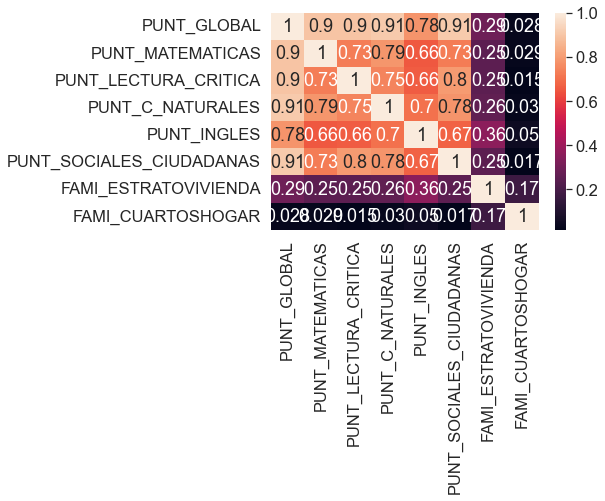

In [104]:
cols = [#'Clasificación_label',
        #'Clasificación',
       # 'ESTU_GENERO',
        'PUNT_GLOBAL', 
        'PUNT_MATEMATICAS',
        'PUNT_LECTURA_CRITICA', 
        'PUNT_C_NATURALES', 
        'PUNT_INGLES', 
        'PUNT_SOCIALES_CIUDADANAS',
        'FAMI_ESTRATOVIVIENDA',
        'FAMI_CUARTOSHOGAR'
        ]
cm = np.corrcoef(df_knn[cols].values.T)
sns.set(font_scale=1.5)
sns.heatmap(cm, cbar=True, annot=True, yticklabels=cols, xticklabels=cols)

Basados en este grafico de correlaciones, vamos a usar las variablesde estato y número de cuartos en el hogar para entrenar el modelo de vecinos cercanos.

In [107]:
df_knn = df_knn.sample(10000)
df_knn

Clasificación_label Clasificación  PUNT_GLOBAL  PUNT_MATEMATICAS  \
1480854                    0      Inferior          157                23   
1029712                    1      Superior          246                60   
580162                     1      Superior          272                66   
1416705                    0      Inferior          252                46   
496551                     0      Inferior          191                40   
...                      ...           ...          ...               ...   
35963                      0      Inferior          249                47   
271427                     0      Inferior          251                49   
1635007                    0      Inferior          173                37   
264258                     0      Inferior          225                43   
568587                     0      Inferior          251                43   

         PUNT_LECTURA_CRITICA  PUNT_C_NATURALES  PUNT_INGLES  \
1480854                    40                30         41.0   
1029712                    42                48         43.0   
580162                     56                51         45.0   
1416705                    58                50         45.0   
496551                     45                38         41.0   
...                       ...               ...          ...   
35963                      53                47         56.0   
271427                     55                53         41.0   
1635007                    35                31         44.0   
264258                     51                47         37.0   
568587                     61                48         59.0   

         PUNT_SOCIALES_CIUDADANAS  FAMI_ESTRATOVIVIENDA  FAMI_CUARTOSHOGAR  
1480854                        29                     2                  2  
1029712                        49                     2                  2  
580162                         48                     2                  2  
1416705                        49                     3                  3  
496551                         29                     0                  6  
...                           ...                   ...                ...  
35963                          50                     4                  2  
271427                         47                     1                  3  
1635007                        32                     1                  3  
264258                         42                     2                  4  
568587                         46                     1                  2  

[10000 rows x 10 columns]

In [127]:
df_knn = df_knn.sample(10000)
Carateristicas_Estudiantes = ['FAMI_ESTRATOVIVIENDA', 'FAMI_CUARTOSHOGAR']
X = df_knn[Carateristicas_Estudiantes]
y = df_knn['Clasificación_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# Siempre es mejor aplicar un escalamiento a los datos de entrenamiento y de prueba
X_test_scaled = scaler.transform(X_test)


#Entrenamos el modelo 
knn = KNeighborsClassifier(n_neighbors = 90)
knn.fit(X_train_scaled, y_train)

print('Presición de los datos de entrenamiento: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))
print('Presición de los datos de prueba: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))

Presición de los datos de entrenamiento: 0.58
Presición de los datos de prueba: 0.58


In [134]:
Prediccion_Estudiante = knn.predict([[1, 2]])
Nom_Etiqueta[Prediccion_Estudiante[0]]

'Superior'

# Analisis de las pruebas de Matemáticas

In [13]:
columnas_Eng=[
    'ESTU_GENERO',
    'PERIODO',
    'PUNT_GLOBAL',
    'DESEMP_INGLES',
    'FAMI_ESTRATOVIVIENDA'
]

# Analisis de las pruebas de ingles

Para este caso vamos a considerar que los estudiantes que presentaron el IXFES y obtuvieron una nota de B+ en su prueba de ingles on biligues.

In [14]:
columnas_Eng=[
    'ESTU_GENERO',
    'PERIODO',
    'PUNT_GLOBAL',
    'DESEMP_INGLES',
    'FAMI_ESTRATOVIVIENDA'
]

In [15]:
df_Eng = df[columnas_Eng].replace({20194:20192,
                             20204:20202, 'Sin Estrato': 'Estrato 0'})
df_Eng.head()

ESTU_GENERO  PERIODO  PUNT_GLOBAL DESEMP_INGLES FAMI_ESTRATOVIVIENDA
0           M    20202          261            A1            Estrato 5
1           F    20202          306            A2            Estrato 3
2           F    20202          321            A1            Estrato 1
3           M    20202          338            A2            Estrato 3
4           M    20202          225            A-            Estrato 1

In [16]:
len(df_Eng['DESEMP_INGLES'].unique())

5

In [17]:
(df_Eng['DESEMP_INGLES']=='B+').astype(int).mean()

0.02207673282777688

In [18]:
(df_Eng['DESEMP_INGLES']=='A-').astype(int).mean()

0.4948604992657856

In [19]:
(df_Eng['DESEMP_INGLES']=='A1').astype(int).mean()

0.28291586442457045

In [20]:
(df_Eng['DESEMP_INGLES']=='A2').astype(int).mean()

0.13373368168366906

In [21]:
(df_Eng['DESEMP_INGLES']=='B1').astype(int).mean()

0.066413221798198

<AxesSubplot:xlabel='DESEMP_INGLES'>

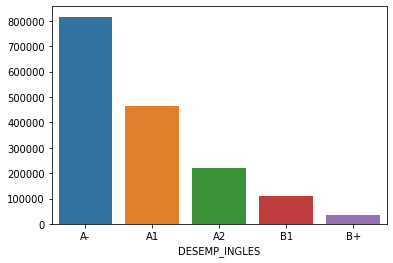

In [22]:
asd= df_Eng.groupby('DESEMP_INGLES')['PUNT_GLOBAL'].count()
sns.barplot(x=asd.index, y =asd.values, order = ['A-', 'A1', 'A2', 'B1', 'B+'])

In [23]:
df_Eng['Bilingue']=np.where(df['DESEMP_INGLES']== 'B+', 'Si', 'No')

In [24]:
df_Eng.head()

ESTU_GENERO  PERIODO  PUNT_GLOBAL DESEMP_INGLES FAMI_ESTRATOVIVIENDA  \
0           M    20202          261            A1            Estrato 5   
1           F    20202          306            A2            Estrato 3   
2           F    20202          321            A1            Estrato 1   
3           M    20202          338            A2            Estrato 3   
4           M    20202          225            A-            Estrato 1   

  Bilingue  
0       No  
1       No  
2       No  
3       No  
4       No

### Primero veamos cual es la proporción entre mujeres y hombres biligues

Vamos a tabular el número de hombres y mujeres biligues

In [25]:
dx = df_Eng[["Bilingue", "ESTU_GENERO"]].dropna()  # dropna drops cases where either variable is missing
pd.crosstab(dx.Bilingue, dx.ESTU_GENERO)

ESTU_GENERO       F       M
Bilingue                   
No           875462  738060
Si            19033   17393

El primer paso para calcular el intervalo de confianza necesitamos la proporción de biligues y el numero total de personas que presentaron el ICFES

In [26]:
dz = dx.groupby(dx.ESTU_GENERO).agg({"Bilingue": [lambda x: np.mean(x=="Si"), np.size]})
dz.columns = ["Proportion", "Total_n"] # The default column names are unclear, so we replace them here
dz

Proportion  Total_n
ESTU_GENERO                     
F              0.021278   894495
M              0.023023   755453

Además, como el intervalo de confianza depende esta conectado con el error estandar. Recordando que el error estandar nos dice que tan lejos debemos esperar obtener una estimación del valor verdadero.

In [27]:
p = dz.Proportion.F # Female proportion
n = dz.Total_n.F # Total number of females
se_female = np.sqrt(p * (1 - p) / n)
print(se_female)

p = dz.Proportion.M # Male proportion
n = dz["Total_n"].M # Total number of males
se_male = np.sqrt(p * (1 - p) / n)
print(se_male)

0.0001525827359126963
0.00017255275896112005


Por último calculamos los intervalos de confianza

In [28]:
p = dz.Proportion.F # Female proportion
n = dz.Total_n.F # Total number of females
lcb = p - 1.96 * np.sqrt(p * (1 - p) / n)  
ucb = p + 1.96 * np.sqrt(p * (1 - p) / n)
print('El intervalo de confianza para la proporción de mujeres bilingues es:')
print(lcb, ucb)

El intervalo de confianza para la proporción de mujeres bilingues es:
0.02097886560691111 0.021576989931688884


In [29]:
p = dz.Proportion.M # Male proportion
n = dz.Total_n.M # Total number of males
lcb = p - 1.96 * np.sqrt(p * (1 - p) / n)  
ucb = p + 1.96 * np.sqrt(p * (1 - p) / n)
print('El intervalo de confianza para la proporción de hombres bilingues es:')
print(lcb, ucb)

El intervalo de confianza para la proporción de hombres bilingues es:
0.022685068721873775 0.023361475537001363


En ls gieuiente celda calulamos el error estandar de la diferencia entre la proporción de mujeres y hombres bilingues

In [30]:
se_diff = np.sqrt(se_female**2 + se_male**2)
se_diff

0.00023033876339795264

In [31]:
d = dz.Proportion.F - dz.Proportion.M
lcb = d - 2*se_diff
ucb = d + 2*se_diff
print(lcb, ucb)

-0.002206021886933477 -0.0012846668333416666


Este es un intervalo de confianza del 95%

Ahora, nosotros creemos que la proporción de biligues varia fuertemente con el estrato.

In [32]:
#df_Eng_Est["agegrp"] = pd.cut(df_Eng.FAMI_ESTRATOVIVIENDA, ['Sin Estrato','Estraro 1', 'Estraro 2', 'Estraro 3', 'Estraro 4', 'Estraro 5', 'Estrato 6'])
pr = df_Eng.groupby(["FAMI_ESTRATOVIVIENDA", "ESTU_GENERO"]).agg({"Bilingue": lambda x: np.mean(x=="Si")}).unstack()
pr.columns = ["F", "M"]
pr

F         M
FAMI_ESTRATOVIVIENDA                    
Estrato 0             0.004335  0.006472
Estrato 1             0.002026  0.002790
Estrato 2             0.006957  0.008037
Estrato 3             0.027060  0.026050
Estrato 4             0.120178  0.098111
Estrato 5             0.227321  0.191348
Estrato 6             0.361779  0.326891

Text(0, 0.5, 'Mujeres - Hombres bilingues')

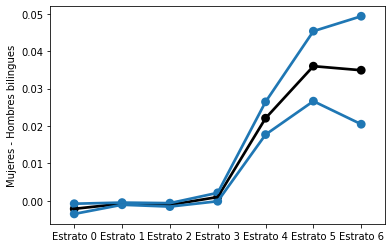

In [33]:
# Calculate the smoking rates within age/gender groups
pr = df_Eng.groupby(["FAMI_ESTRATOVIVIENDA", "ESTU_GENERO"]).agg({"Bilingue": lambda x: np.mean(x=="Si")}).unstack()
pr.columns = ["F", "M"]

# The number of people for each calculated proportion
dn = df_Eng.groupby(["FAMI_ESTRATOVIVIENDA", "ESTU_GENERO"]).agg({"Bilingue": np.size}).unstack()
dn.columns = ["F", "M"]

# Standard errors for each proportion
se = np.sqrt(pr * (1 - pr) / dn)

# Standard error for the difference in female/male smoking rates in every age band
se_diff = np.sqrt(se.F**2 + se.M**2)

# Standard errors for the difference in smoking rates between genders, within age bands

# The difference in smoking rates between genders
pq = pr.F - pr.M

x = np.arange(pq.size)
pp = sns.pointplot(x = x, y = pq.values, color='black')
sns.pointplot(x = x, y = pq - 2*se_diff)
sns.pointplot(x = x,y = pq + 2*se_diff)
pp.set_xticklabels(pq.index)
#pp.set_xlabel("Estrato")
pp.set_ylabel("Mujeres - Hombres bilingues")

<AxesSubplot:xlabel='Bilingue'>

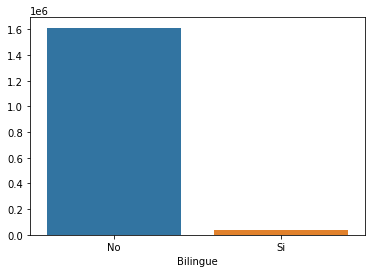

In [34]:
asd= df_Eng.groupby('Bilingue')['ESTU_GENERO'].count()
sns.barplot(x=asd.index, y =asd.values)